<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 14</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Introducción a Ecuaciones Diferenciales y Método de Euler
    </p>
</div>

En esta nueva unidad, exploraremos métodos numéricos para resolver **ecuaciones diferenciales ordinarias**, también conocidas como EDO's (o ODE's, por su sigla en inglés: Ordinary Differential Equations).

Antes de avanzar, es importante entender qué es una ecuación diferencial ordinaria y por qué son fundamentales en las ciencias y la ingeniería. Para llegar a esa definición, partamos por algo más familiar: las ecuaciones algebraicas.

#### **¿Qué es una ecuación algebráica?**

Una ecuación algebraica es una **igualdad matemática** que involucra una o más **incógnitas**, y nuestro objetivo principal es encontrar los **valores** que hacen que la igualdad se cumpla.

Por ejemplo, considere la siguiente ecuación:

$$ x^3 + x  = 2x^2 $$

En este caso, manipulando algebraicamente la ecuación anterior, llegamos a la conclusión de que es una ecuación cúbica:

$$ x^3 + x  = 2x^2  \rightarrow x^3 -2x^2 + x  = 0 \rightarrow x(x^2-2x+1) = 0 \rightarrow x(x-1)^2 = 0$$

que tiene por solución $x=0$ y $x=1$.

Este tipo de ecuaciones son bien conocidas: trabajamos con ellas desde la enseñanza media, y existen métodos algebraicos y numéricos bastante desarrollados para resolverlas.

Sin embargo, muchas situaciones reales en física, biología, economía y otras ciencias no se modelan con ecuaciones algebraicas, sino con **ecuaciones diferenciales**, que involucran **derivadas**.

#### **¿Qué es una ecuación diferencial?**

Así como una ecuación algebraica busca encontrar valores numéricos que satisfacen una igualdad, una ecuación diferencial también es una igualdad, pero esta vez la incógnita no es un número, sino una **función**.

En otras palabras, en lugar de preguntarnos *¿Qué número satisface la igualdad?*, nos preguntamos *¿Qué función satisface la igualdad?*.

Considere la siguiente ecuación de ejemplo:

$$ y^2(t) e^t = y'(t) $$

Aquí, la incógnita es una función $y(t)$, y la ecuación además involucra la derivada de esa función. Por eso, a este tipo de ecuaciones se les llama ecuaciones diferenciales. El desafío es encontrar una función $y(t)$ tal que, al evaluarla y derivarla, la igualdad se cumpla. 

En este caso, solución general es:

$$ y(t) = \frac{1}{c-e^t} ~~;~~ c= \text{constante arbitraria}$$

*(Comprobación en pizarra*)

#### **Problema de valor inicial:** Ecuación Diferencial con condiciones iniciales

¿Por qué aparece una constante en la solución de la ecuación anterior?

Cuando resolvemos una ecuación diferencial, generalmente debemos integrar en algún momento del proceso. Como sabes del cálculo, al integrar aparece una constante de integración, porque hay infinitas funciones cuya derivada es la misma.

Eso significa que la ecuación diferencial no tiene una única solución, sino una familia de funciones que cumplen la igualdad, dependiendo del valor de esa constante:

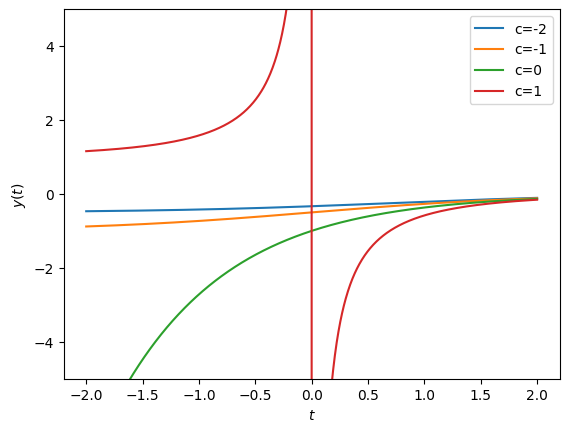

In [3]:
import numpy as np
import matplotlib.pyplot as plt

c = np.array([-2, -1, 0, 1])
t = np.linspace(-2, 2, 1000, True)

def y(t, c):
    return 1/(c-np.exp(t))


for ci in c:
    plt.plot(t, y(t,ci), label=f"c={ci}")

plt.legend()
plt.ylim(-5, 5)
plt.xlabel("$t$")
plt.ylabel("$y(t)$")

plt.show()


¿Cuál es la correcta? Todas!

Pero si queremos que nuestra función cumpla una condición específica, como por ejemplo:

$$ y(0) = \frac{1}{2} $$

entonces: $$ y(0) = \frac{1}{c-e^0} = \frac{1}{2}  \rightarrow c-1 = 2 \rightarrow c = 3$$

Finalmente, la solución de esta ecuación diferencial para el caso particular es:

$$ y(t) = \frac{1}{3-e^t} $$

<!-- *Plantee la ecuación diferencial para caída libre y defina condiciones iniciales.* -->

Existen un montón de tipos de ecuaciones diferenciales, que describen fenómenos físicos. Como por ejemplo:

**Ecuación de Calor**:

$$ \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} $$

Al resolverla, encontramos la función $T(x,t)$, que presenta la distribución de temperatura de un cuerpo con conductividad térmica $\kappa$, y cómo esta evoluciona con el paso del tiempo $t$. Esta se conoce como ecuación diferencial parcial, por que contiene derivadas parciales y la incógnita es una función de más de una variable.

**Ecuación de Gravitación para la interacción entre dos cuerpos**:

$$ - G\frac{mM}{r^2} \hat{r} = m \frac{d^2 r}{dt^2} $$

Al resolverla, encontramos la función $r(t)$ que describe la posición en función del tiempo de un cuerpo celeste que es sometido a una fuerza gravitatoria ejercida por otro cuerpo de mayor masa. Esta es una ecuación diferencial ordinaria, debido a que la función $r(t)$ depende unicamente de una variable.


Como han podido notar, las ecuaciones diferenciales son cruciales para el estudio de muchos fenómenos de la naturaleza, por lo que se necesitan tanto métodos analíticos como numéricos para resolverlas.

<!-- En esta primera parte, estudiaremos ecuaciones diferenciales ordinarias de primer orden, es decir, que la ecuación solo involucra a lo más primeras derivadas. -->

<!-- Como por ejemplo la caída libre de un objeto considerando la resistencia del aire. -->

<!-- *Plantear ecuaciones diferenciales a partir de $F=ma$ en pizarra*. -->

En muchas ocasiones, las ecuaciones diferenciales son demasiado complejas de abordar analíticamente, incluso, muchas no tienen solución analítica. Por esta razón, existen métodos numéricos para encontrar una solución aproximada.


#### Método de Euler

Consideremos una ecuación diferencial de primer orden en su forma estándar:

$$ \frac{dy}{dt} = f(t, y) $$

En el caso de nuestra ecuación anterior:

$$ \frac{dy}{dt} = e^t y^2 $$

Para aproximar la solución, utilizamos el método de **diferencias hacia adelante** (forward difference) para encontrar derivadas numéricas:

$$ \frac{dy}{dt} \approx \frac{y(t+h) - y(t)}{h} = \frac{y_{n+1} - y_n}{h} $$

De esta forma, tenemos:

$$ \frac{y_{n+1} - y_n}{h} = f(t_n, y_n) $$

Despejando $ y_{n+1} $:

$$ y_{n+1} - y_n = h f(t_n, y_n) $$

$$ \boxed{ y_{n+1} = y_n + h f(t_n, y_n) }$$

Este método nos permite iterar sobre los valores de $y$ para aproximar la solución de la ecuación diferencial.

Text(0, 0.5, '$y(t)$')

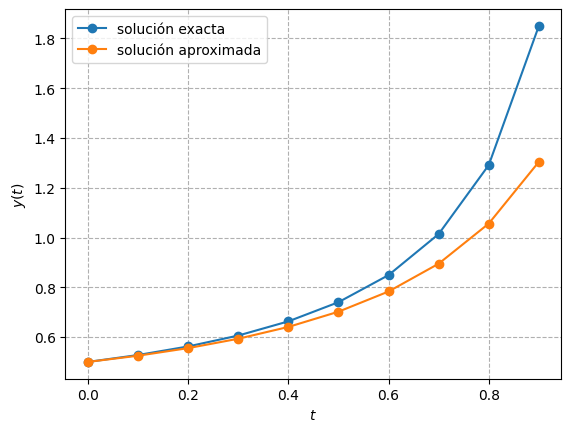

In [ ]:
def Euler_Method(??): # algoritmo de euler

    return ??

def f(t,y): # ec diferencial
    return ??

def y(t):
    return # solución exacta



Probando para un $h$ más pequeño:

In [ ]:
# código



<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio:**

Se dejan caer simultáneamente desde 20 metros de altura: una pelota de ping-pong, cuya masa es $m=2.7g$, con un radio $r=2$ cm, y una pelota de acero del mismo tamaño pero con una masa de $m=220g$. para ambas pelotas, la fuerza de resistencia del aire es $F=6\pi \eta r v$ (ley de Stokes), donde $\eta = 1.8 \times 10^{-5}  \text{kg m}^{-1} \text{s}^{-1}$ es la viscosidad del aire, $r$ el radio de la pelota y $v$ su rapidez.

  a) Calcule la velocidad terminal de cada pelota

  b) Determine cuál llega primero al suelo y por cuánto tiempo de diferencia

Encuentre la solución númerica de este problema usando el método de Euler y además compare su resultado aproximado con la solución analítica (exacta) del problema.

</div>

In [ ]:
## código acá


<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

- Definimos lo que era una ecuación diferencial
- Estudiamos con encontrar soluciones a ecuaciones diferenciales simples: de variables separables
- Definimos el método de Euler para encontrar soluciones aproximadas a ecuaciones diferenciales de primer orden


**Próxima clase:** Ecuaciones Diferenciales: Método de Rungge Kutta de orden 2

</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>